In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

In [2]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)


Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


Text(0.5, 1.0, 'Red - done')

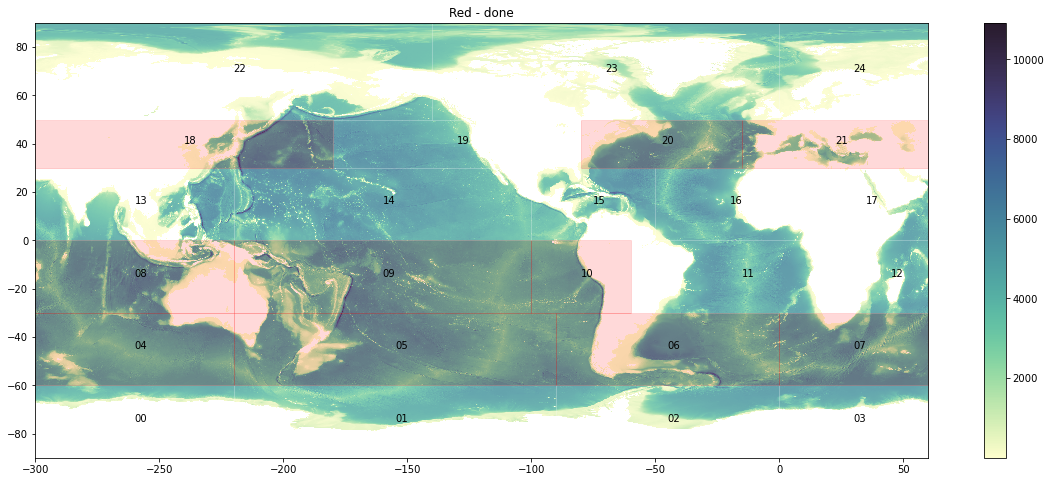

In [3]:
plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::10], GEBCO.latq[::10], zmask(GEBCO.depth[::10,::10]), cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

REGION = []

not_done = 'w'
done = 'r'


#Format for Regions:
# Lower Latitude, Upper Latitude, West Longitude, East Longitude,
#  ID number, status

REGION+= [[-90,-60,-300,-220,
           0,not_done],]
REGION+= [[-90,-60,-220,-90,
           1,not_done],]
REGION+= [[-90,-60,-90,0,
           2,not_done],]
REGION+= [[-90,-60,0,60,
           3,not_done],]

REGION+= [[-60,-30,-300,-220,
           4,done],]
REGION+= [[-60,-30,-220,-90,
           5,done],]
REGION+= [[-60,-30,-90,0,
           6,done],]
REGION+= [[-60,-30,0,60,
           7,done],]

REGION+= [[-30,0,-300,-220,
           8,done],]
REGION+= [[-30,0,-220,-100,
           9,done],]
REGION+= [[-30,0,-100,-60,
           10,done],]
REGION+= [[-30,0,-60,30,
           11,not_done],]
REGION+= [[-30,0,30,60,
           12,not_done],]

REGION+= [[0,30,-300,-220,
           13,not_done],]
REGION+= [[0,30,-220,-100,
           14,not_done],]
REGION+= [[0,30,-100,-50,
           15,not_done],]
REGION+= [[0,30,-50,10,
           16,not_done],]
REGION+= [[0,30,10,60,
           17,not_done],]

REGION+= [[30,50,-300,-180,
           18,done],]
REGION+= [[30,50,-180,-80,
           19,not_done],]
REGION+= [[30,50,-80,-15,
           20,done],]
REGION+= [[30,50,-15,60,
           21,done],]


REGION+= [[50,90,-300,-140,
           22,not_done],]
REGION+= [[50,90,-140,0,
           23,not_done],]
REGION+= [[50,90,0,60,
           24,not_done],]

for region in (REGION[::1]):
    R=region[4]
    C=region[5]
    plt.fill_between([region[2],region[3]],[region[0],region[0]],[region[1],region[1]],color=C,alpha=0.15)
    plt.text(0.5*(region[2]+region[3]),0.5*(region[0]+region[1]),'{:02d}'.format(R),color='k',)
plt.title('Red - done')